Chase Stockwell & Thomas Huang. 

In [1]:
#1. conda install the lxml file
!conda install 'lxml' -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libxslt-1.1.33             |       h31b3aaa_0         556 KB  conda-forge
    lxml-4.4.1                 |   py37h7ec2d77_0         1.5 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  libxslt            conda-forge/linux-64::libxslt-1.1.33-h31b3aaa_0
  lxml               conda-forge/linux-64::lxml-4.4.1-py37h7ec2d77_0



lxml-4.4.1           | 1.5 MB    | ##################################### | 100% 
libxslt-1.1.33       | 556 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [48]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


#2. use requests to get the URL
#3. Extract the text from the page
starting = 1990
team_salaries = []
index = 0
while starting < 2019:
    request = "https://hoopshype.com/salaries/{}-{}/".format(str(starting), str(starting+1))
    r = requests.get(request)
    #print(request)
    #4. Use BeautifulSoup to read and parse the data, as html or lxml
    #root = BeautifulSoup( r.content, 'html.parser' )
    root = BeautifulSoup(r.content, 'html.parser')


    #5. Use prettify to view the content and find the appropriate table
    root.prettify()


    #6. Use find() to save the aforementioned table as a variable
    solar_table = root.find('table')            	# Find a the tables.


    #7. Use pandas to read the HTML file
    list_df = pd.read_html(str(solar_table) )
    #print(list_df[0])
    
    
    if starting == 1990:
        team_salaries = list_df[0]
        
    #8 Set reasonable names for the table columns. Also adds the year of the dataset. 
        team_salaries.columns = ['Rank', 'NBA Team', 'Total Salary', 'Total Salary (adj.)']
        yr = []
        for i in range(len(team_salaries.index)):
            yr.append(starting)
        team_salaries['Year'] = yr
        #print('first option')
    else: 
        #print('bingo')
        team_salaries2 = list_df[0]

    #8 Set reasonable names for the table columns. Also adds the year of the dataset. 
        team_salaries2.columns = ['Rank', 'NBA Team', 'Total Salary', 'Total Salary (adj.)']
        yr = []
        for i in range(len(team_salaries2.index)):
            yr.append(starting)
        team_salaries2['Year'] = yr
        #print(team_salaries2.head(10))
        
        team_salaries = pd.concat([team_salaries, team_salaries2])
        #print(team_salaries.head(50))
        #print('next')    
    #print(team_salaries.head(50))
    starting = starting + 1

#We now have our working dataframe that we will use for the NBA salaries. It is tidied up now, because the year has been merged into a separate variable
#and the data now grows vertically instead of horizontally.

#print(team_salaries)
#Now we have the entire table in different sections. 

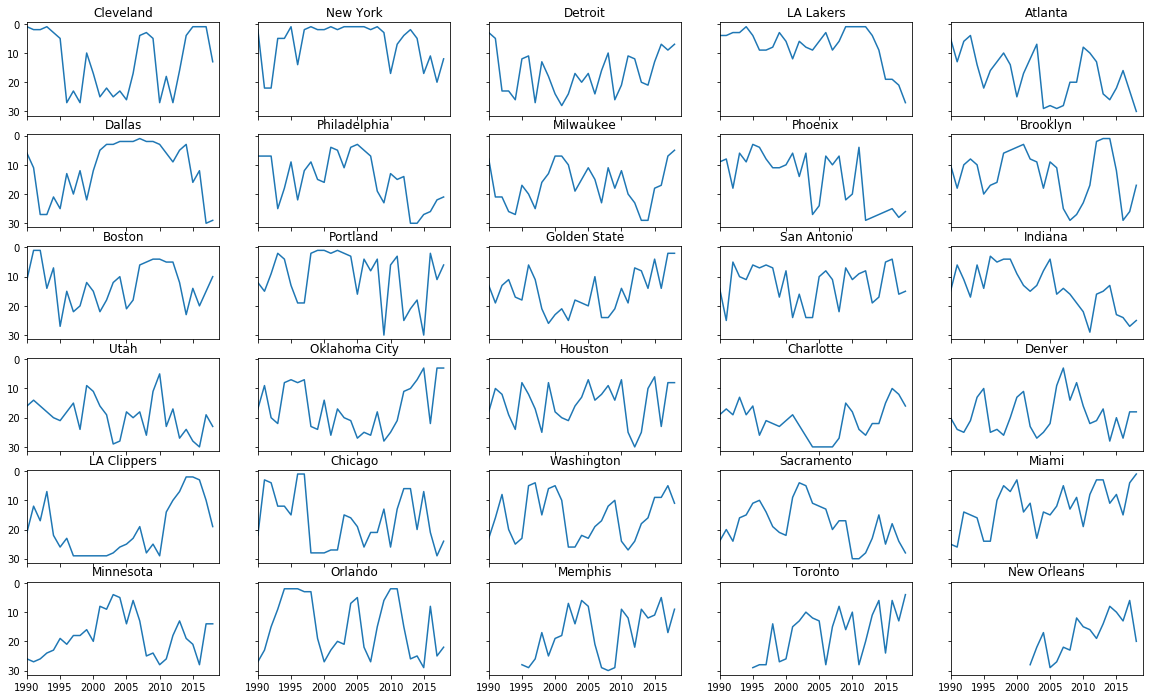

In [52]:
#Next, we will create a graphic of the teams over time to see how their payroll increases. 
import matplotlib.pyplot as plt

tidy_x = [1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]
#We just want to initialize our x and y values here for the graphs. We will not use all of the years or all of the payrolls
x = team_salaries['Year']
y = team_salaries['Rank']


#There are 30 teams, so we want to make 30 possible teams so we can follow their distributions
fig, axes = plt.subplots(nrows = 6, ncols = 5, sharey = True, sharex = True, figsize = (20,12))
plt.xlim(1990, 2019)

#We want to add each distribution per team. We must first make sure we limit only values that are pertaining to the specific franchise.
index = 0
for row in axes:
    for col in row:
        x = team_salaries[team_salaries['NBA Team'] == team_salaries['NBA Team'].unique()[index]]
        y = team_salaries[team_salaries['NBA Team'] == team_salaries['NBA Team'].unique()[index]]
        
        #Then, we want to graph the item to make it available, and add a title over the name so the reader knows which team is which.  
        col.plot(x['Year'] , y['Rank'])
        col.set_title(team_salaries['NBA Team'].unique()[index])
        index = index + 1
        
plt.gca().invert_yaxis()

        


This graph shows demonstrates which teams in the NBA had the largest salary cap relative to other NBA teams for the last 20 years. Over the years, the ranking of each of the 30 NBA teams has fluctuated in who was paying the most money for their players over the years. In MileStone 1, we defined player success as them getting a large contract to play for their teams. We also wanted to compare their salary to the team salary their team was making. Thus, we would be able to have a ratio of how important their contract was to their team. This graph is the first part of solving this problem, demonstrating which teams were spending the most money to satisfy the star players on their squad. 